# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

Türkiye'de yetiştirilen Keçimen ve Besni kuru üzüm çeşitlerinin CVS ile görüntüleri elde edilmiştir. Her iki çeşitten 450 adet olmak üzere toplam 900 adet kuru üzüm tanesi kullanılmıştır. Bu görüntüler çeşitli ön işleme aşamalarından geçirilmiş ve 7 morfolojik özellik çıkarılmıştır. Bu özellikler üç farklı yapay zeka tekniği kullanılarak sınıflandırılmıştır.

Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

Öznitelik Bilgileri:

1. Alan: Kuru üzümün sınırları içindeki piksel sayısını verir.
2. Çevre: Kuru üzümün sınırları ile çevresindeki pikseller arasındaki mesafeyi hesaplayarak çevreyi ölçer.
3. MajorAxisLength: Üzüm üzerine çizilebilecek en uzun çizgi olan ana eksenin uzunluğunu verir.
4. MinorAxisLength: Üzüm üzerine çizilebilecek en kısa çizgi olan küçük eksenin uzunluğunu verir.
5. Eksantriklik: Kuru üzümlerle aynı momentlere sahip olan elipsin eksantrikliğinin bir ölçüsünü verir.
   küçük ekseni/Büyük  seksen
6. DışbükeyAlan: Kuru üzümün oluşturduğu bölgenin en küçük dışbükey kabuğunun piksel sayısını verir.
7. Kapsam: Kuru üzümün oluşturduğu bölgenin sınırlayıcı kutudaki toplam piksellere oranını verir.
8. Sınıf: Keçimen ve Besni kuru üzüm.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [4]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [7]:
df.head(1)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen


In [8]:
df['Class'].value_counts()
# bu  balance  data  olduğu anlaşiılıyor,  
# balance   data   accuracy kullanılır

Kecimen    450
Besni      450
Name: Class, dtype: int64

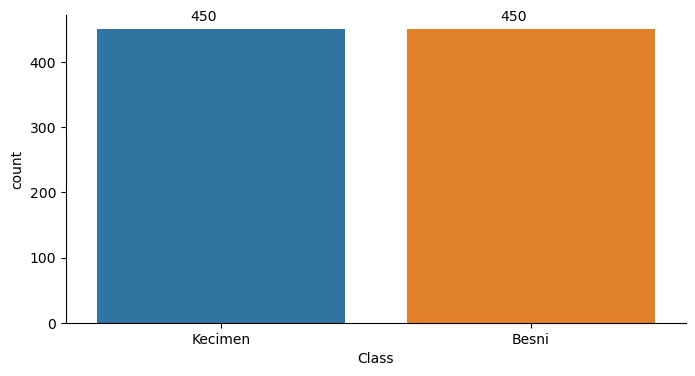

In [9]:
ax = sns.countplot(df['Class'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));
#

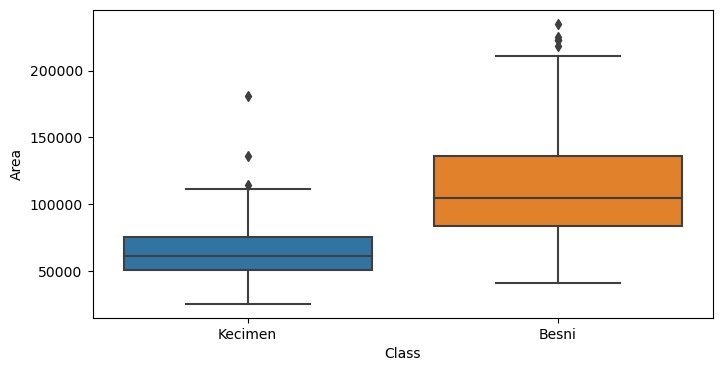

In [10]:
sns.boxplot(x = "Class", y =  "Area", data = df );

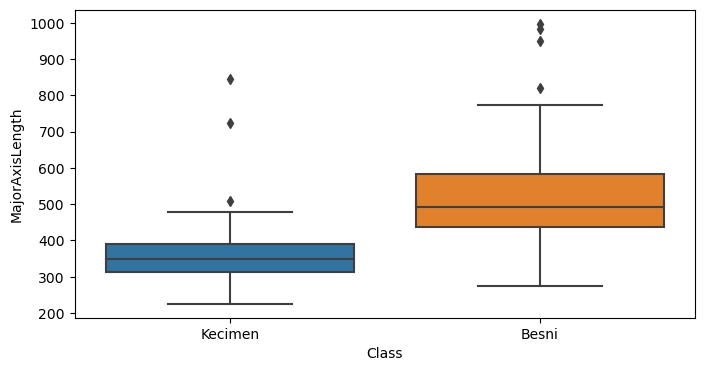

In [11]:
sns.boxplot(x = "Class", y =  "MajorAxisLength", data = df );

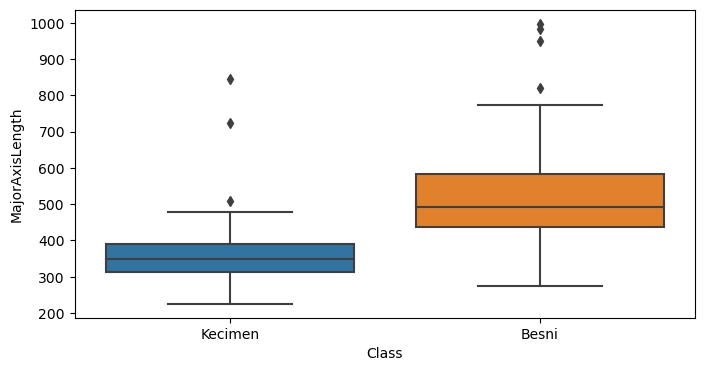

In [12]:
sns.boxplot(x = "Class", y =  "MajorAxisLength", data = df );

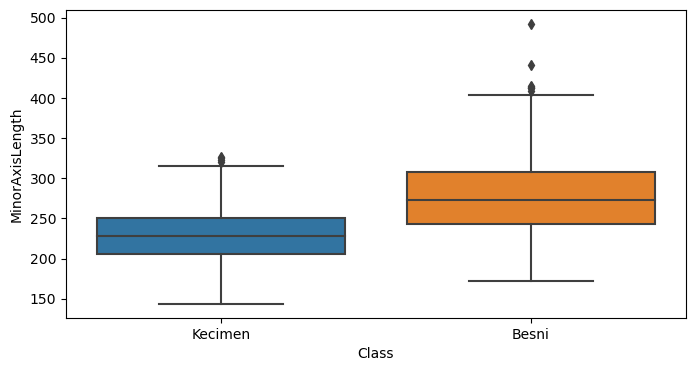

In [13]:
sns.boxplot(x = "Class", y =  "MinorAxisLength", data = df );

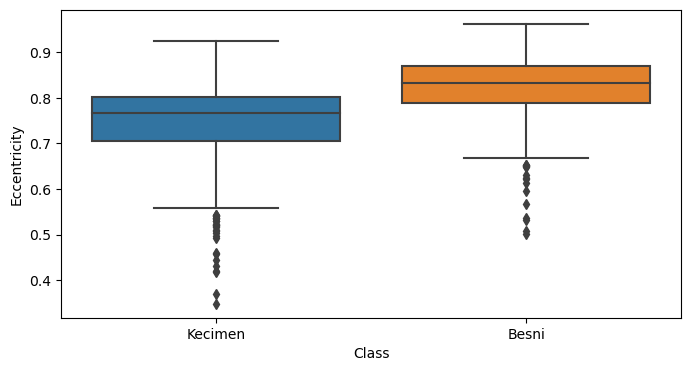

In [14]:
sns.boxplot(x = "Class", y =  "Eccentricity", data = df );

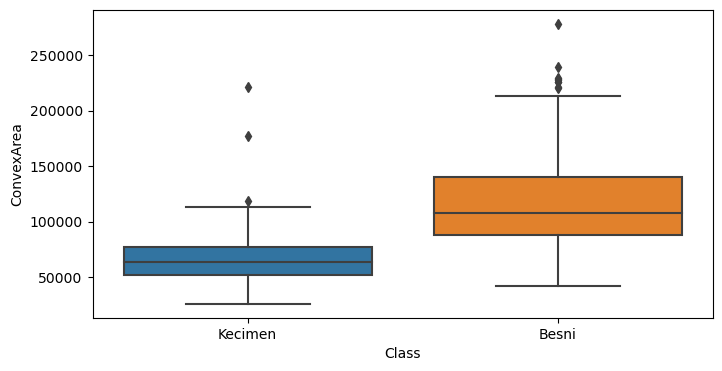

In [15]:
sns.boxplot(x = "Class", y =  "ConvexArea", data = df );

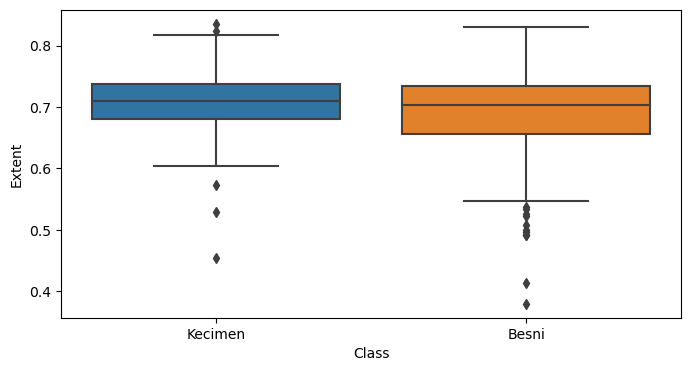

In [16]:
sns.boxplot(x = "Class", y =  "Extent", data = df );

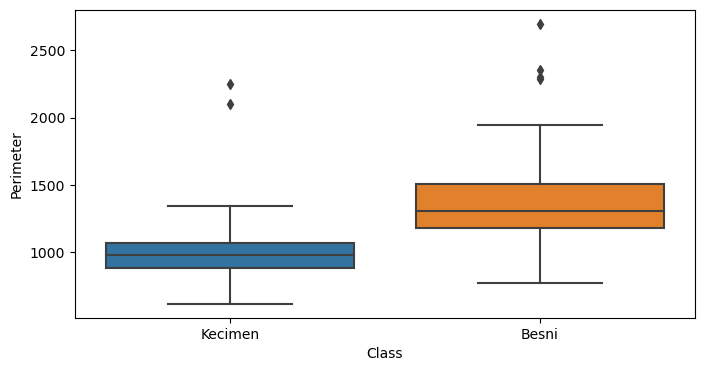

In [17]:
sns.boxplot(x = "Class", y =  "Perimeter", data = df );

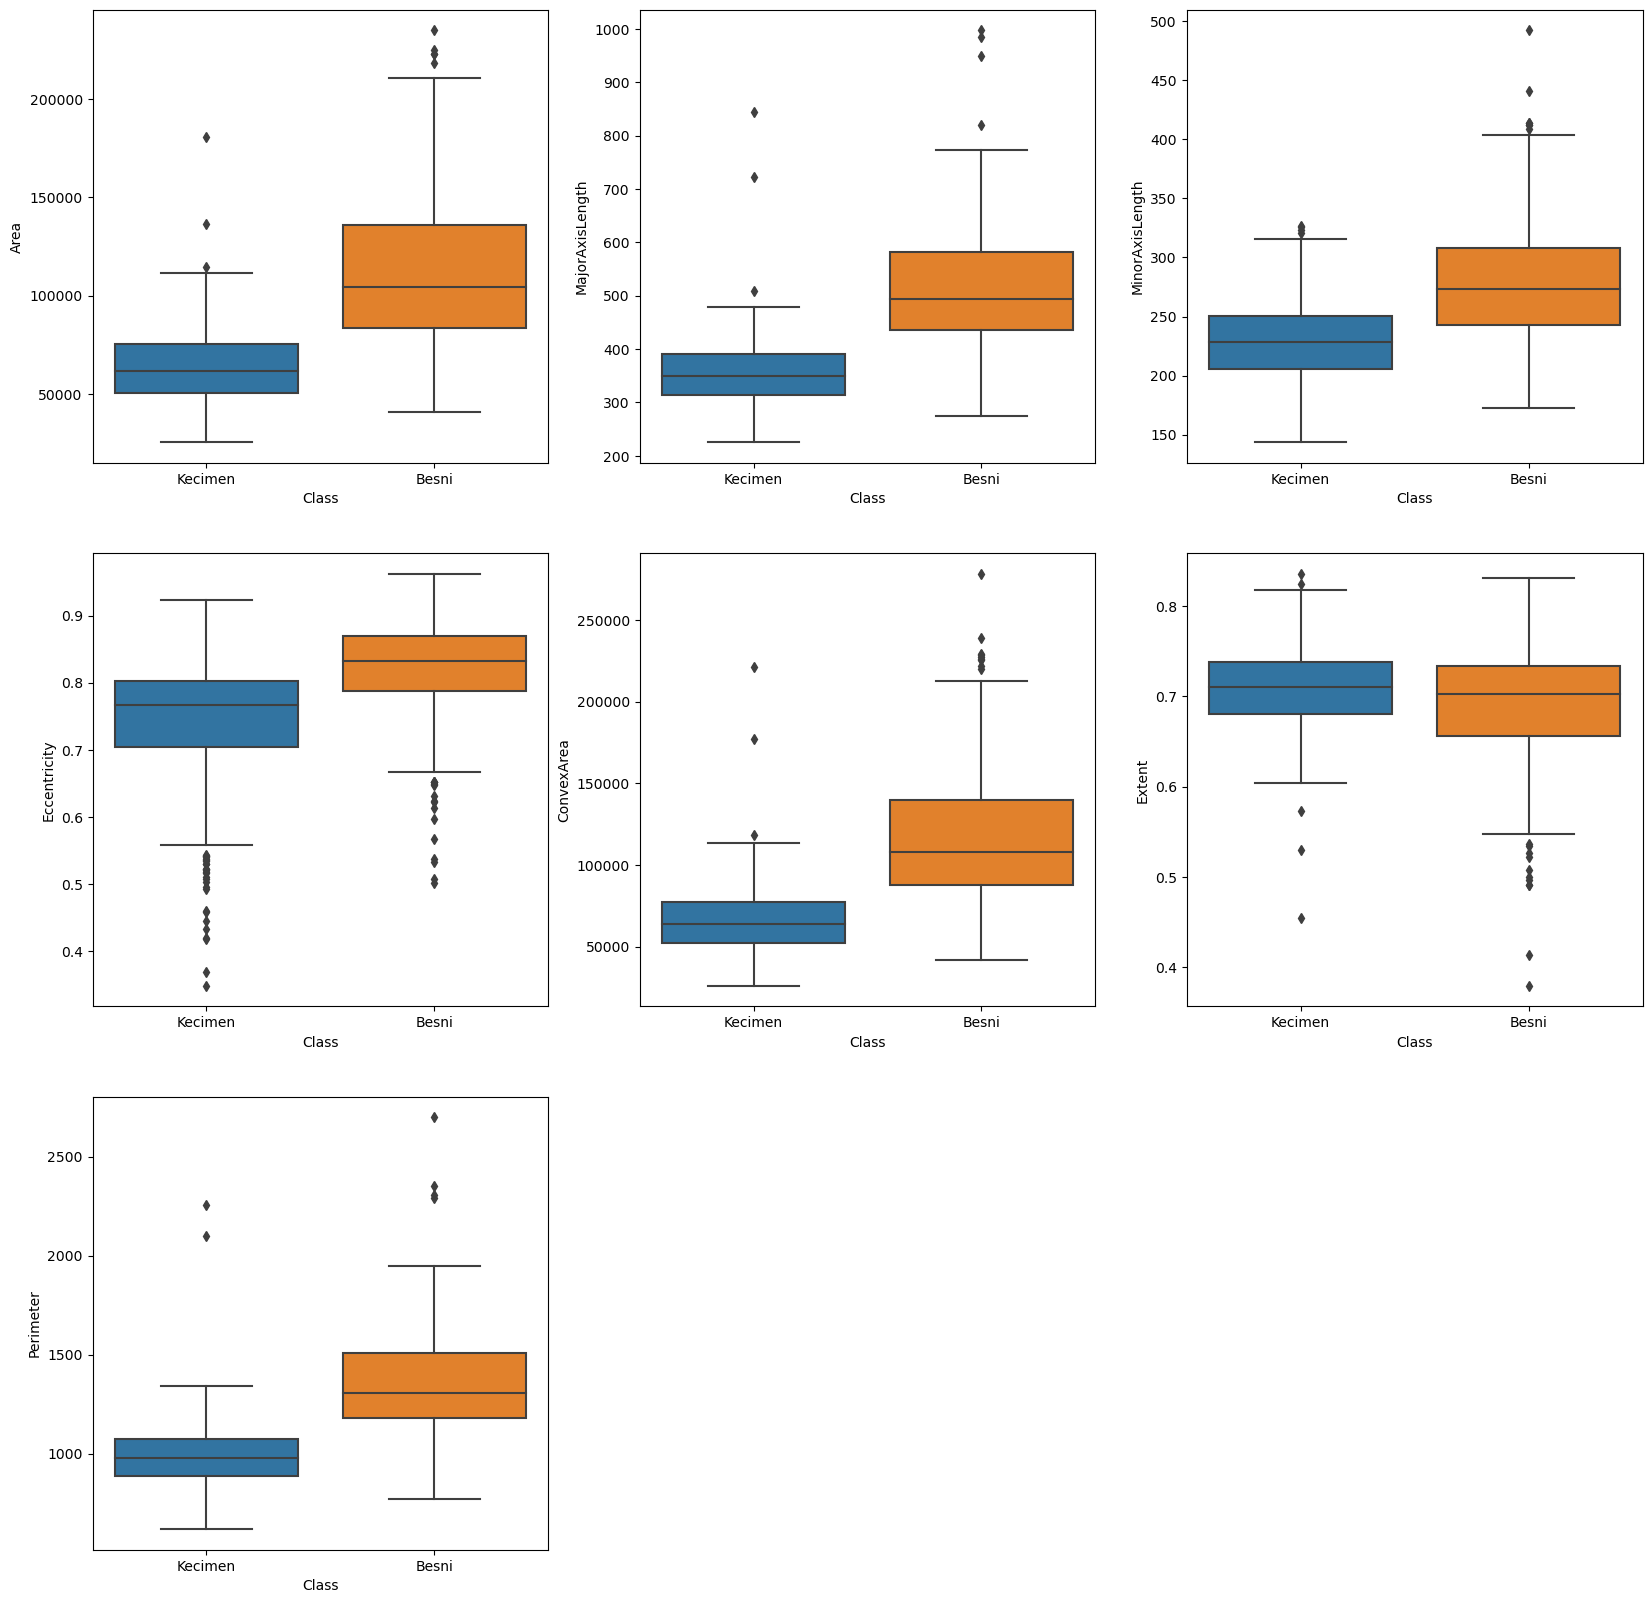

In [103]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

In [108]:
df.head(1)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen


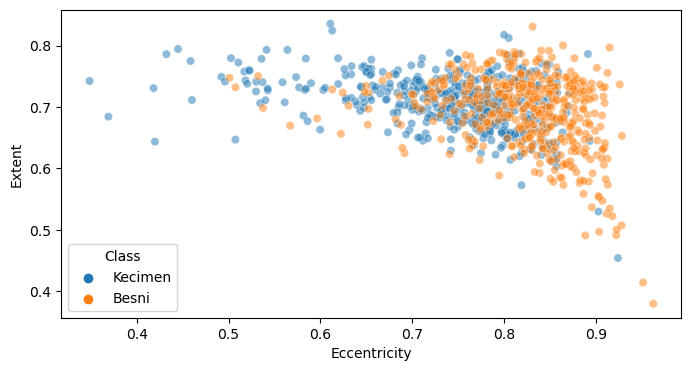

In [19]:
sns.scatterplot(x = "Eccentricity", y = "Extent", data = df, hue = "Class", alpha = 0.5);

###  Multicolinerty ?

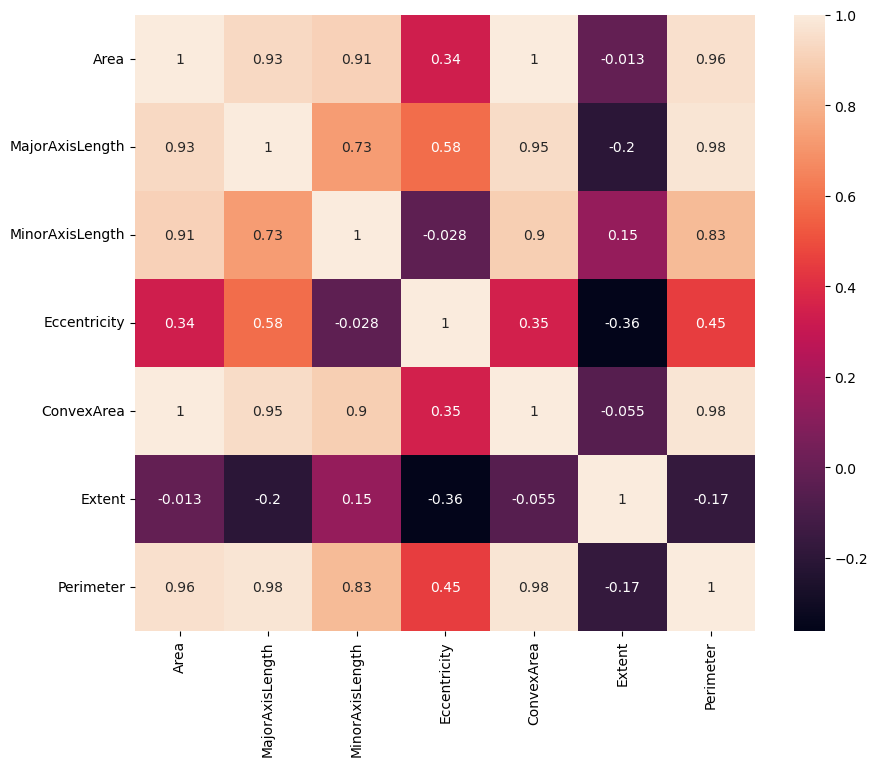

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

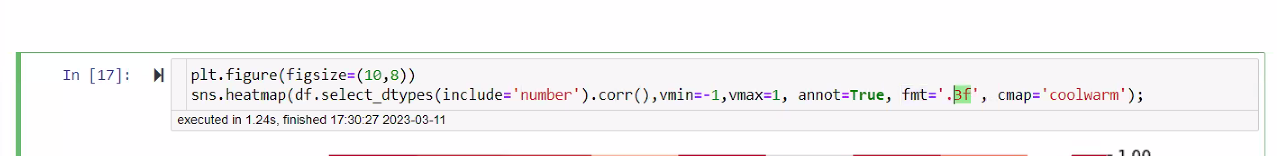

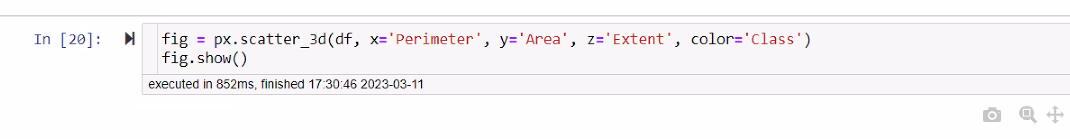

satatify = y  unbalance  day-talarda     tarin ve  test aynı sayıda  gözlem alması için    yazdık

In [106]:
df.corr()["Class"].drop("Class").sort_values().plot.barh()
plt.show()

KeyError: 'Class'

In [2]:
sns.pairplot(df, hue='Class');

NameError: name 'sns' is not defined

## Train | Test Split and Scaling

In [89]:
X = df.drop('Class', axis=1)
y = df["Class"]

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
scaler = StandardScaler()

In [112]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression 
## Modeling

In [29]:
from sklearn.linear_model import LogisticRegression

In [113]:
log_model = LogisticRegression()

In [114]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [116]:
y_pred = log_model.predict(X_test_scaled)

In [117]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [118]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
65,59370,345.949,221.922,0.767,61464,0.697,981.517,Kecimen,Kecimen,0.836
381,31237,262.347,155.026,0.807,32564,0.614,718.847,Kecimen,Kecimen,0.972
669,98166,420.702,299.584,0.702,100659,0.707,1245.034,Besni,Besni,0.370
603,136180,551.454,316.470,0.819,139701,0.730,1461.030,Besni,Besni,0.025
5,49242,318.125,200.122,0.777,51368,0.658,881.836,Kecimen,Kecimen,0.912
211,46961,343.789,177.137,0.857,48476,0.615,891.528,Kecimen,Kecimen,0.831
874,101770,468.668,279.813,0.802,103475,0.785,1233.824,Besni,Besni,0.268
302,69846,368.451,243.975,0.749,72585,0.677,1040.716,Kecimen,Kecimen,0.739
431,58570,355.400,214.567,0.797,60494,0.658,962.708,Kecimen,Kecimen,0.807
783,102960,522.381,252.365,0.876,105956,0.742,1311.161,Besni,Besni,0.080


In [34]:
log_model.coef_

array([[-0.60782534, -0.5429431 ,  0.66946588, -0.11002039, -0.41662785,
         0.09194668, -1.94277464]])

In [35]:
log_model.intercept_

array([-0.50100794])

In [36]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 

In [39]:
len(y_pred),len(y_pred),

(180, 180)

In [40]:
y_pred_proba = log_model.predict_proba(X_test_scaled) # 0 ve 1 klaslarına ait olma olasılık değerlerini verir
y_pred_proba  # yukarıdaki 1 ve 0 sıfır değerleri oluşturan olasılık değeri veriyor 0 klasındaki değer > 0.5 => 0 , değilse 1 klası büyktür 1 yazar

array([[2.43877107e-01, 7.56122893e-01],
       [7.38204909e-01, 2.61795091e-01],
       [9.97737555e-01, 2.26244543e-03],
       [7.83402404e-01, 2.16597596e-01],
       [8.87310588e-01, 1.12689412e-01],
       [9.56089163e-02, 9.04391084e-01],
       [8.90879793e-01, 1.09120207e-01],
       [1.73898426e-01, 8.26101574e-01],
       [6.15465030e-01, 3.84534970e-01],
       [5.17792366e-01, 4.82207634e-01],
       [9.71270901e-01, 2.87290994e-02],
       [5.15493450e-01, 4.84506550e-01],
       [7.22934363e-01, 2.77065637e-01],
       [6.39585147e-01, 3.60414853e-01],
       [8.44811454e-02, 9.15518855e-01],
       [2.57092929e-01, 7.42907071e-01],
       [2.83470479e-02, 9.71652952e-01],
       [3.92874383e-02, 9.60712562e-01],
       [2.05110377e-01, 7.94889623e-01],
       [3.75449475e-01, 6.24550525e-01],
       [6.44108803e-02, 9.35589120e-01],
       [9.45542410e-01, 5.44575898e-02],
       [9.99135210e-01, 8.64789816e-04],
       [9.99999394e-01, 6.05817770e-07],
       [1.145558

In [41]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
184,81546,381.349,273.810,0.696,82807,0.712,1057.448,Kecimen
532,82161,441.796,246.810,0.829,86909,0.630,1222.158,Besni
501,164782,660.364,322.621,0.873,169000,0.758,1654.986,Besni
517,97375,468.904,268.267,0.820,100169,0.695,1244.252,Besni
871,105091,507.685,268.087,0.849,108296,0.700,1295.591,Besni
...,...,...,...,...,...,...,...,...
616,199015,615.417,413.927,0.740,201464,0.769,1687.866,Besni
231,52693,283.504,242.114,0.520,54860,0.738,895.745,Kecimen
620,78984,427.494,236.883,0.832,82328,0.698,1169.476,Besni
629,83059,440.560,243.637,0.833,88806,0.686,1238.163,Besni


In [42]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data
# 1 olma olasılığına göre  dataframe   çeviriyoruz, yani sadece  1 e göre  olasılıkları  döndürdük
# yer kazandık, yüksek degerler 1  düşük değerler 0 olacak 
# test datada   tahmin olasılığı   test result  tutturdu sonuuc yakaladı
#yani 0.96  yüksek olasılık  o halde  1 tahmin ederken , 0.011    ise  1 olma olasılığı düşük  o sebeple  0  tahmin eder

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba
184,81546,381.349,273.810,0.696,82807,0.712,1057.448,Kecimen,0.756
532,82161,441.796,246.810,0.829,86909,0.630,1222.158,Besni,0.262
501,164782,660.364,322.621,0.873,169000,0.758,1654.986,Besni,0.002
517,97375,468.904,268.267,0.820,100169,0.695,1244.252,Besni,0.217
871,105091,507.685,268.087,0.849,108296,0.700,1295.591,Besni,0.113
...,...,...,...,...,...,...,...,...,...
616,199015,615.417,413.927,0.740,201464,0.769,1687.866,Besni,0.004
231,52693,283.504,242.114,0.520,54860,0.738,895.745,Kecimen,0.965
620,78984,427.494,236.883,0.832,82328,0.698,1169.476,Besni,0.374
629,83059,440.560,243.637,0.833,88806,0.686,1238.163,Besni,0.245


In [46]:
test_data["pred"] = y_pred
test_data
 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
147,54428,339.115,206.646,0.793,56175,0.723,922.878,Kecimen,0.880,Kecimen
6,42492,310.146,176.131,0.823,43904,0.666,823.796,Kecimen,0.931,Kecimen
288,74426,411.697,231.750,0.827,76449,0.679,1071.612,Kecimen,0.573,Kecimen
768,175247,713.017,316.398,0.896,179961,0.592,1739.277,Besni,0.000,Besni
322,45567,278.502,216.767,0.628,49075,0.714,854.724,Kecimen,0.964,Kecimen
755,171749,671.255,328.910,0.872,175679,0.738,1689.585,Besni,0.001,Besni
846,75368,387.852,250.585,0.763,77706,0.735,1078.409,Besni,0.680,Kecimen
106,48945,269.370,239.162,0.460,51456,0.711,872.289,Kecimen,0.974,Kecimen
171,59076,350.487,216.679,0.786,61643,0.645,988.273,Kecimen,0.795,Kecimen
652,98464,488.215,261.724,0.844,101977,0.679,1259.069,Besni,0.160,Besni


In [49]:
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
185,43563,296.522,188.196,0.773,45174,0.696,817.410,Kecimen,0.951,Kecimen
174,51941,349.226,191.817,0.836,53893,0.709,912.259,Kecimen,0.860,Kecimen
435,28216,245.401,150.246,0.791,30316,0.622,683.004,Kecimen,0.980,Kecimen
77,42637,293.430,189.432,0.764,44052,0.725,814.182,Kecimen,0.957,Kecimen
320,61289,376.375,208.728,0.832,63997,0.639,998.470,Kecimen,0.717,Kecimen
520,155702,655.399,304.612,0.885,160709,0.697,1626.909,Besni,0.002,Besni
813,152611,663.133,297.418,0.894,158488,0.615,1755.968,Besni,0.001,Besni
509,169009,719.506,301.565,0.908,174718,0.717,1781.378,Besni,0.000,Besni
420,86421,367.170,300.794,0.573,87929,0.749,1080.007,Kecimen,0.815,Kecimen
694,172783,820.724,352.194,0.903,219952,0.497,2289.889,Besni,0.000,Besni


In [51]:
test_data.groupby('Class').pred.value_counts()
# bu kodun aynı  skorlarını  confussion matrix  verecek
# burada  modeliizin yaptığı yanlış tahminlerin syısını manuel baktık

Class    pred   
Besni    Besni      71
         Kecimen    11
Kecimen  Kecimen    92
         Besni       6
Name: pred, dtype: int64

## Model Performance

In [52]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# 4  skorumuz var   bunlar üzerinde yorumlama yapacağız

In [53]:
accuracy_score(y_test,y_pred)
# % 91   doğru tahmin  yapmış sadece  bun bakılmaz  ama
#gerçek  değerlerle  tahmin  değerleri  karşılaştırıyor

0.9055555555555556

In [54]:
log_model.score(X_test_scaled, y_test) 
# log_model içine x ve y testleri alır. accuracy_score ile aynı değerleri verir.

0.9055555555555556

In [59]:
#precision = precision_score(y_test, y_pred, pos_label="Besni")
#print(precision)

0.922077922077922


In [60]:
# precision_score(y_test,y_pred)

ValueError: pos_label=1 is not a valid label. It should be one of ['Besni', 'Kecimen']

In [61]:
precision = precision_score(y_test, y_pred, pos_label="Kecimen")
print(precision)

0.8932038834951457


In [64]:
recall_score(y_test,y_pred, pos_label="Kecimen")


0.9387755102040817

In [66]:
f1_score(y_test,y_pred, pos_label="Kecimen")

0.9154228855721394

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [68]:
confusion_matrix(y_test, y_pred)
#  bunu  anlamak için görselleştiriyoruz sayısal  değerle yazdırdık 
# sonra  göresel için plotlama yapıyoruz 

array([[71, 11],
       [ 6, 92]], dtype=int64)

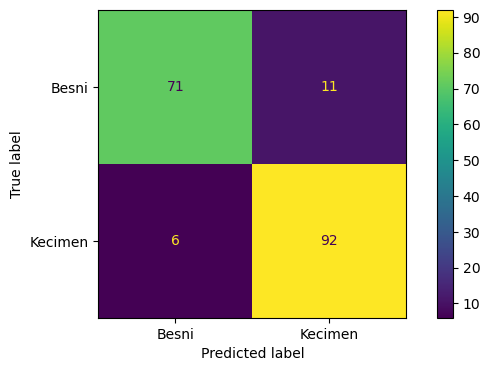

In [69]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

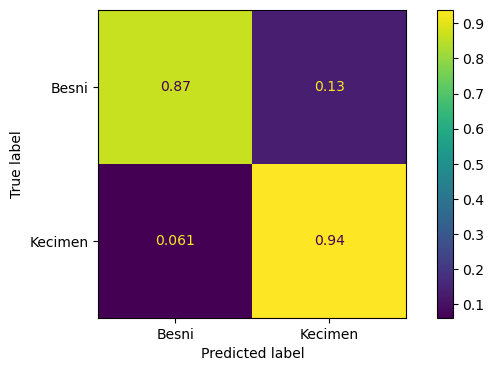

In [70]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');
# normalize true   dediğmizde   oransal veriyor 
#satrısal oalrak ornlıyor

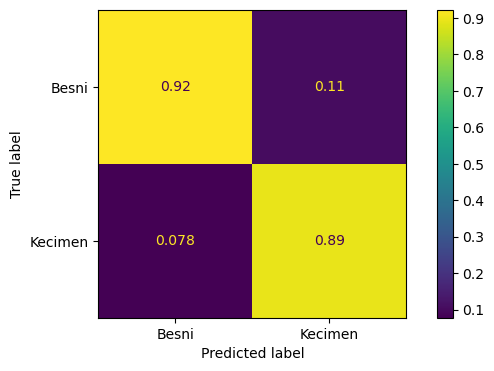

In [72]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');
# normalize pred dediğmzide  predelerin oransal  oranını  stun stun veriyor

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Besni       0.92      0.87      0.89        82
     Kecimen       0.89      0.94      0.92        98

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



In [74]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       368
     Kecimen       0.84      0.88      0.86       352

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [119]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [120]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[308  56]
 [ 39 317]]
              precision    recall  f1-score   support

       Besni       0.89      0.85      0.87       364
     Kecimen       0.85      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [121]:
from sklearn.model_selection import cross_validate
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [122]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.010,0.001,NaN,NaN,NaN,NaN
2,0.008,0.001,NaN,NaN,NaN,NaN
3,0.007,0.002,NaN,NaN,NaN,NaN
4,0.005,0.001,NaN,NaN,NaN,NaN
5,0.009,0.002,NaN,NaN,NaN,NaN
6,0.015,0.001,NaN,NaN,NaN,NaN
7,0.013,0.001,NaN,NaN,NaN,NaN
8,0.012,0.002,NaN,NaN,NaN,NaN
9,0.000,0.000,NaN,NaN,NaN,NaN
10,0.016,0.000,NaN,NaN,NaN,NaN


In [97]:
df_scores.mean()[2:]

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
dtype: float64

### GridSearchCV

In [123]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [126]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV ile recall iyileştirmek için parametreleri ve değerleri ayarlayıp  1 skorunun değerini iyileştirip hastalaı yakalama oranını artırmak.
model = LogisticRegression()

penalty = [ "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik

param_grid = {"penalty" : penalty,
              "C" : C, # alpha gibi çalışıyor  tersini yapıyor
              "class_weight":class_weight,
              "solver":solver}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliriz
                          n_jobs = -1) # bütün işlemcile  buraya yönelecek

In [127]:
len(C)

20

In [128]:
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(penalty='l1', solver='saga')
# clf = LogisticRegression(penalty='l1', solver='liblinear')


In [129]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [130]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [131]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [14 80]]
              precision    recall  f1-score   support

       Besni       0.84      0.87      0.86        86
     Kecimen       0.88      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[305  59]
 [ 38 318]]
              precision    recall  f1-score   support

       Besni       0.89      0.84      0.86       364
     Kecimen       0.84      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [133]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

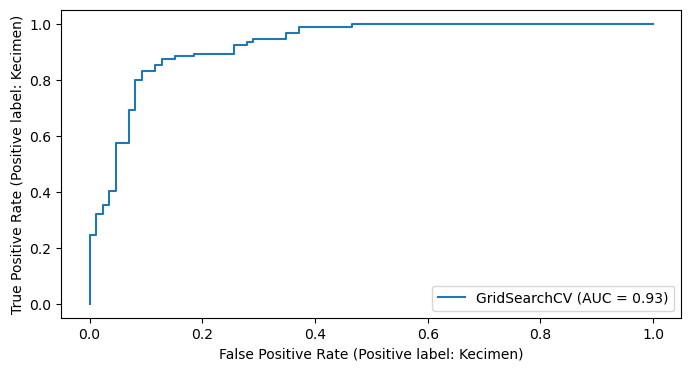

In [134]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show() # balans datalarda

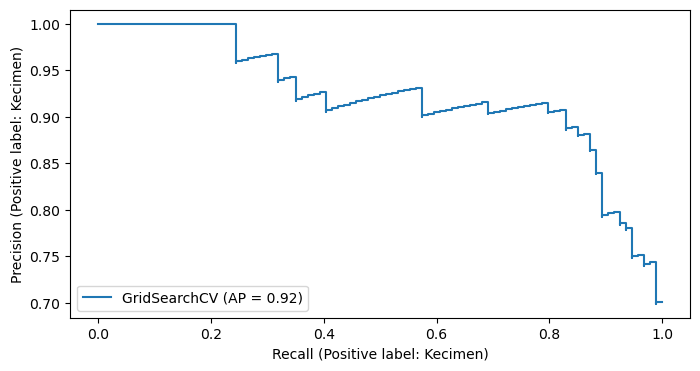

In [135]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show() #unbalance datalarda 

# Conclusion 

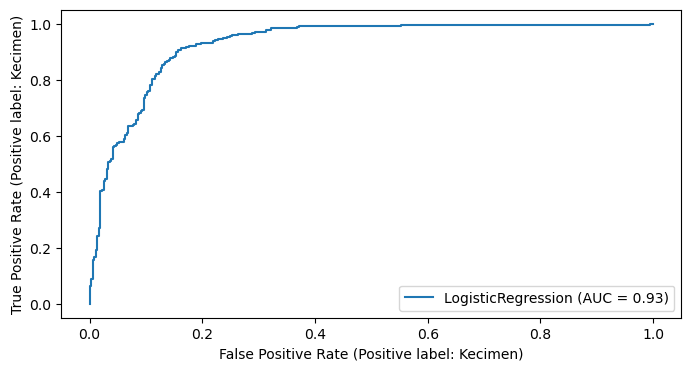

In [136]:
plot_roc_curve(log_model, X_train_scaled, y_train);  
plt.show()

In [138]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9272904062229905

In [139]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
#best thresholds belirleme: 1 sınıfına ait y train ve y_pred tahmin verdiğimizde 
# amacımız ;minimum false positive rate ve max true positive rate değerlerini bulup en iyi treshold değerini bulmak
# threshold değeri 0 ile 1 arasındadır. 

ValueError: y_true takes value in {'Besni', 'Kecimen'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [140]:
optimal_idx = np.argmax(tp_rate - fp_rate)# maximum değer index nosu
optimal_threshold = thresholds[optimal_idx] # bulduğumuz index nomarasının treshold değerini verir. en iyi değer default 0.5 değil treshold 0.3393 değeridir.  
optimal_threshold

NameError: name 'tp_rate' is not defined

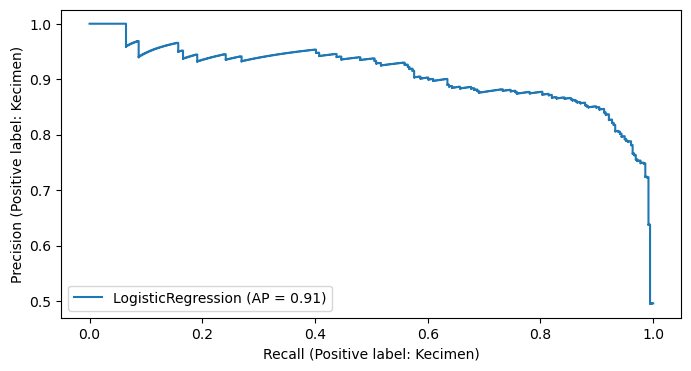

In [141]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);
plt.show()

In [142]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

ValueError: pos_label=1 is not a valid label. It should be one of ['Besni', 'Kecimen']

In [143]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

ValueError: y_true takes value in {'Besni', 'Kecimen'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [144]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formülü aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

NameError: name 'precisions' is not defined

In [145]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([2.43504504e-01, 8.00734046e-01, 9.80026636e-01, 6.74328327e-02,
       9.73564919e-01, 5.06606981e-01, 9.77990793e-01, 5.39042324e-01,
       6.70233541e-01, 6.15644902e-01, 2.55311020e-01, 3.92982546e-02,
       1.40463038e-02, 7.96757660e-01, 1.99852192e-03, 7.92626336e-03,
       3.53863543e-01, 9.85293192e-01, 6.58709175e-01, 2.94963117e-01,
       8.02893509e-01, 1.59068740e-02, 9.18357921e-01, 8.71565385e-01,
       1.68423475e-02, 7.91363577e-01, 4.50124410e-01, 2.11874118e-02,
       3.79984324e-01, 1.65075008e-03, 8.32911179e-01, 2.15444104e-02,
       3.20986720e-01, 5.00874994e-02, 2.49389043e-01, 7.27481661e-02,
       9.69205227e-01, 9.19876016e-02, 7.76845366e-01, 9.59895984e-01,
       8.29064555e-01, 9.30802002e-01, 9.67730047e-01, 8.57109797e-01,
       1.55834846e-01, 1.67170482e-01, 9.17343382e-01, 3.86056456e-01,
       3.27420705e-01, 4.14626740e-01, 2.95236017e-01, 9.79159411e-01,
       1.75302844e-01, 9.09603362e-01, 8.70789375e-01, 8.37087214e-01,
      

In [146]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

NameError: name 'optimal_threshold' is not defined

In [147]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

NameError: name 'y_pred2' is not defined

In [148]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

NameError: name 'optimal_threshold' is not defined

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [150]:
model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

NameError: name 'optimal_threshold' is not defined